****ADULT CENSUS INCOME PREDICTION****

****QUESTION  :TO PREDICT THE INCOME OF AN ADULT USING THE CENSUS DATA GIVEN****

****ANSWER:****

****STEP 1:LOADING THE DATA AND CONVERTING IT INTO A DATA FRAME****

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
raw=pd.read_csv("C:/Users/tejaswini banala/Desktop/Datasets/2-8adult.csv")
data=pd.DataFrame(raw)
data

****STEP 2: UNDERSTANDING THE DATA AND ANALYSING THE DATA****

In [2]:
data.replace("?",np.NaN,inplace=True)
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hoursperweek,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


****STEP 3:FINDING THE NULL VALUES IN THE DATASET IF ANY?****

In [3]:
data.apply(lambda x:sum(x.isnull()))

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hoursperweek         0
native.country     583
income               0
dtype: int64

In [4]:
data.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hoursperweek       int64
native.country    object
income            object
dtype: object

In [5]:
data["workclass"].value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [6]:
data["occupation"].value_counts()

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

In [7]:
data["native.country"].value_counts()

United-States                 29170
Mexico                          643
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                           29
Greece                      

****STEP 4: FILLING THE NULL VALUES WITH STATISTICAL STRATEGIES****

In [8]:
data["workclass"].fillna("Private",inplace=True)
data["occupation"].fillna("Prof-specialty",inplace=True)
data["native.country"].fillna("United-States",inplace=True)

In [9]:
data.apply(lambda x:sum(x.isnull()))

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hoursperweek      0
native.country    0
income            0
dtype: int64

****STEP 5: ENCODING THE CATEGORICAL FEATURES INTO NUMERICS USING THE RESPECTIVE METHODS****

In [ ]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder 
labelencoder=LabelEncoder() 
data['workclass']=labelencoder.fit_transform(data['workclass'])
data['occupation']=labelencoder.fit_transform(data['occupation'])
data['income']=labelencoder.fit_transform(data['income'])
data['education']=labelencoder.fit_transform(data['education'])
data['marital.status']=labelencoder.fit_transform(data['marital.status'])
data['relationship']=labelencoder.fit_transform(data['relationship'])
data['race']=labelencoder.fit_transform(data['race'])
data['sex']=labelencoder.fit_transform(data['sex'])
data['native.country']=labelencoder.fit_transform(data['native.country'])
data

****STEP 6: FINDING THE OUTLIERS IF ANY?****

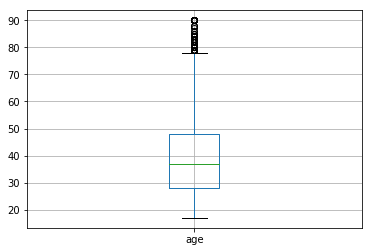

In [11]:
data.boxplot(column='age')

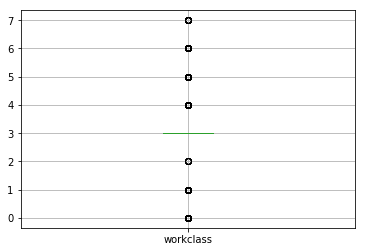

In [12]:
data.boxplot(column='workclass')

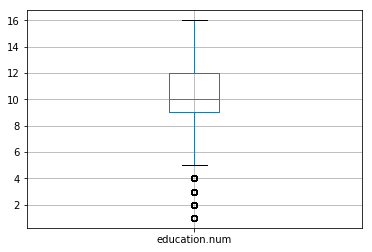

In [13]:
data.boxplot(column='education.num')

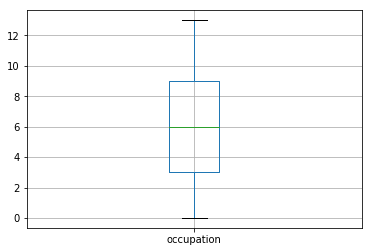

In [14]:
data.boxplot(column='occupation')

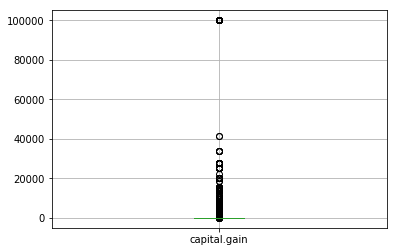

In [15]:
data.boxplot(column='capital.gain')

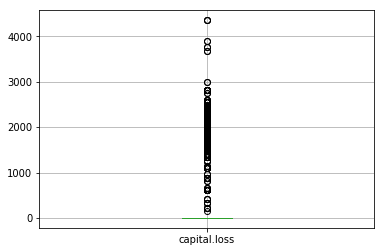

In [16]:
data.boxplot(column='capital.loss')

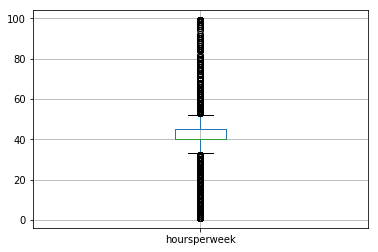

In [17]:
data.boxplot(column='hoursperweek')

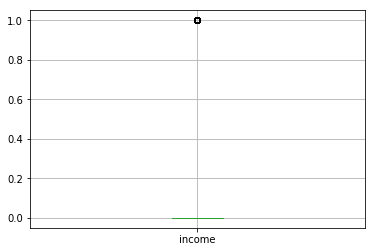

In [18]:
data.boxplot(column='income')

****STEP 7:DATA VISULISATION****

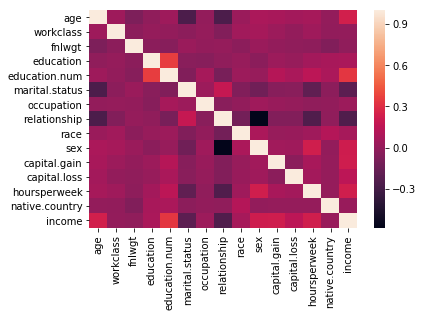

In [19]:
import seaborn as sns
sns.heatmap(data.corr())

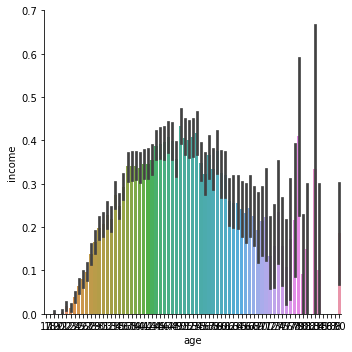

In [119]:
sns.catplot(x="age", y="income",
            kind="bar", data=data)

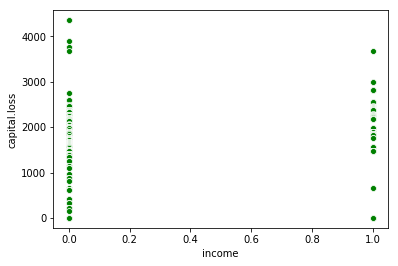

In [136]:
sns.scatterplot(data['income'],data['capital.loss'],color="g")

Text(0, 0.5, 'income')

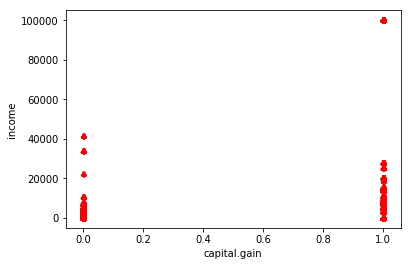

In [134]:
plt.scatter(data['income'],data['capital.gain'],marker=r'$\clubsuit$',c="r")
plt.xlabel('capital.gain')
plt.ylabel('income')

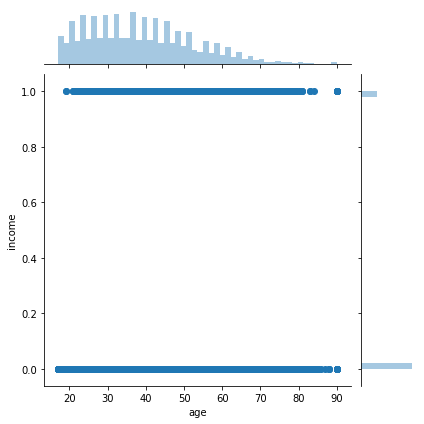

In [126]:
sns.jointplot(x="age",y="income",data=data)

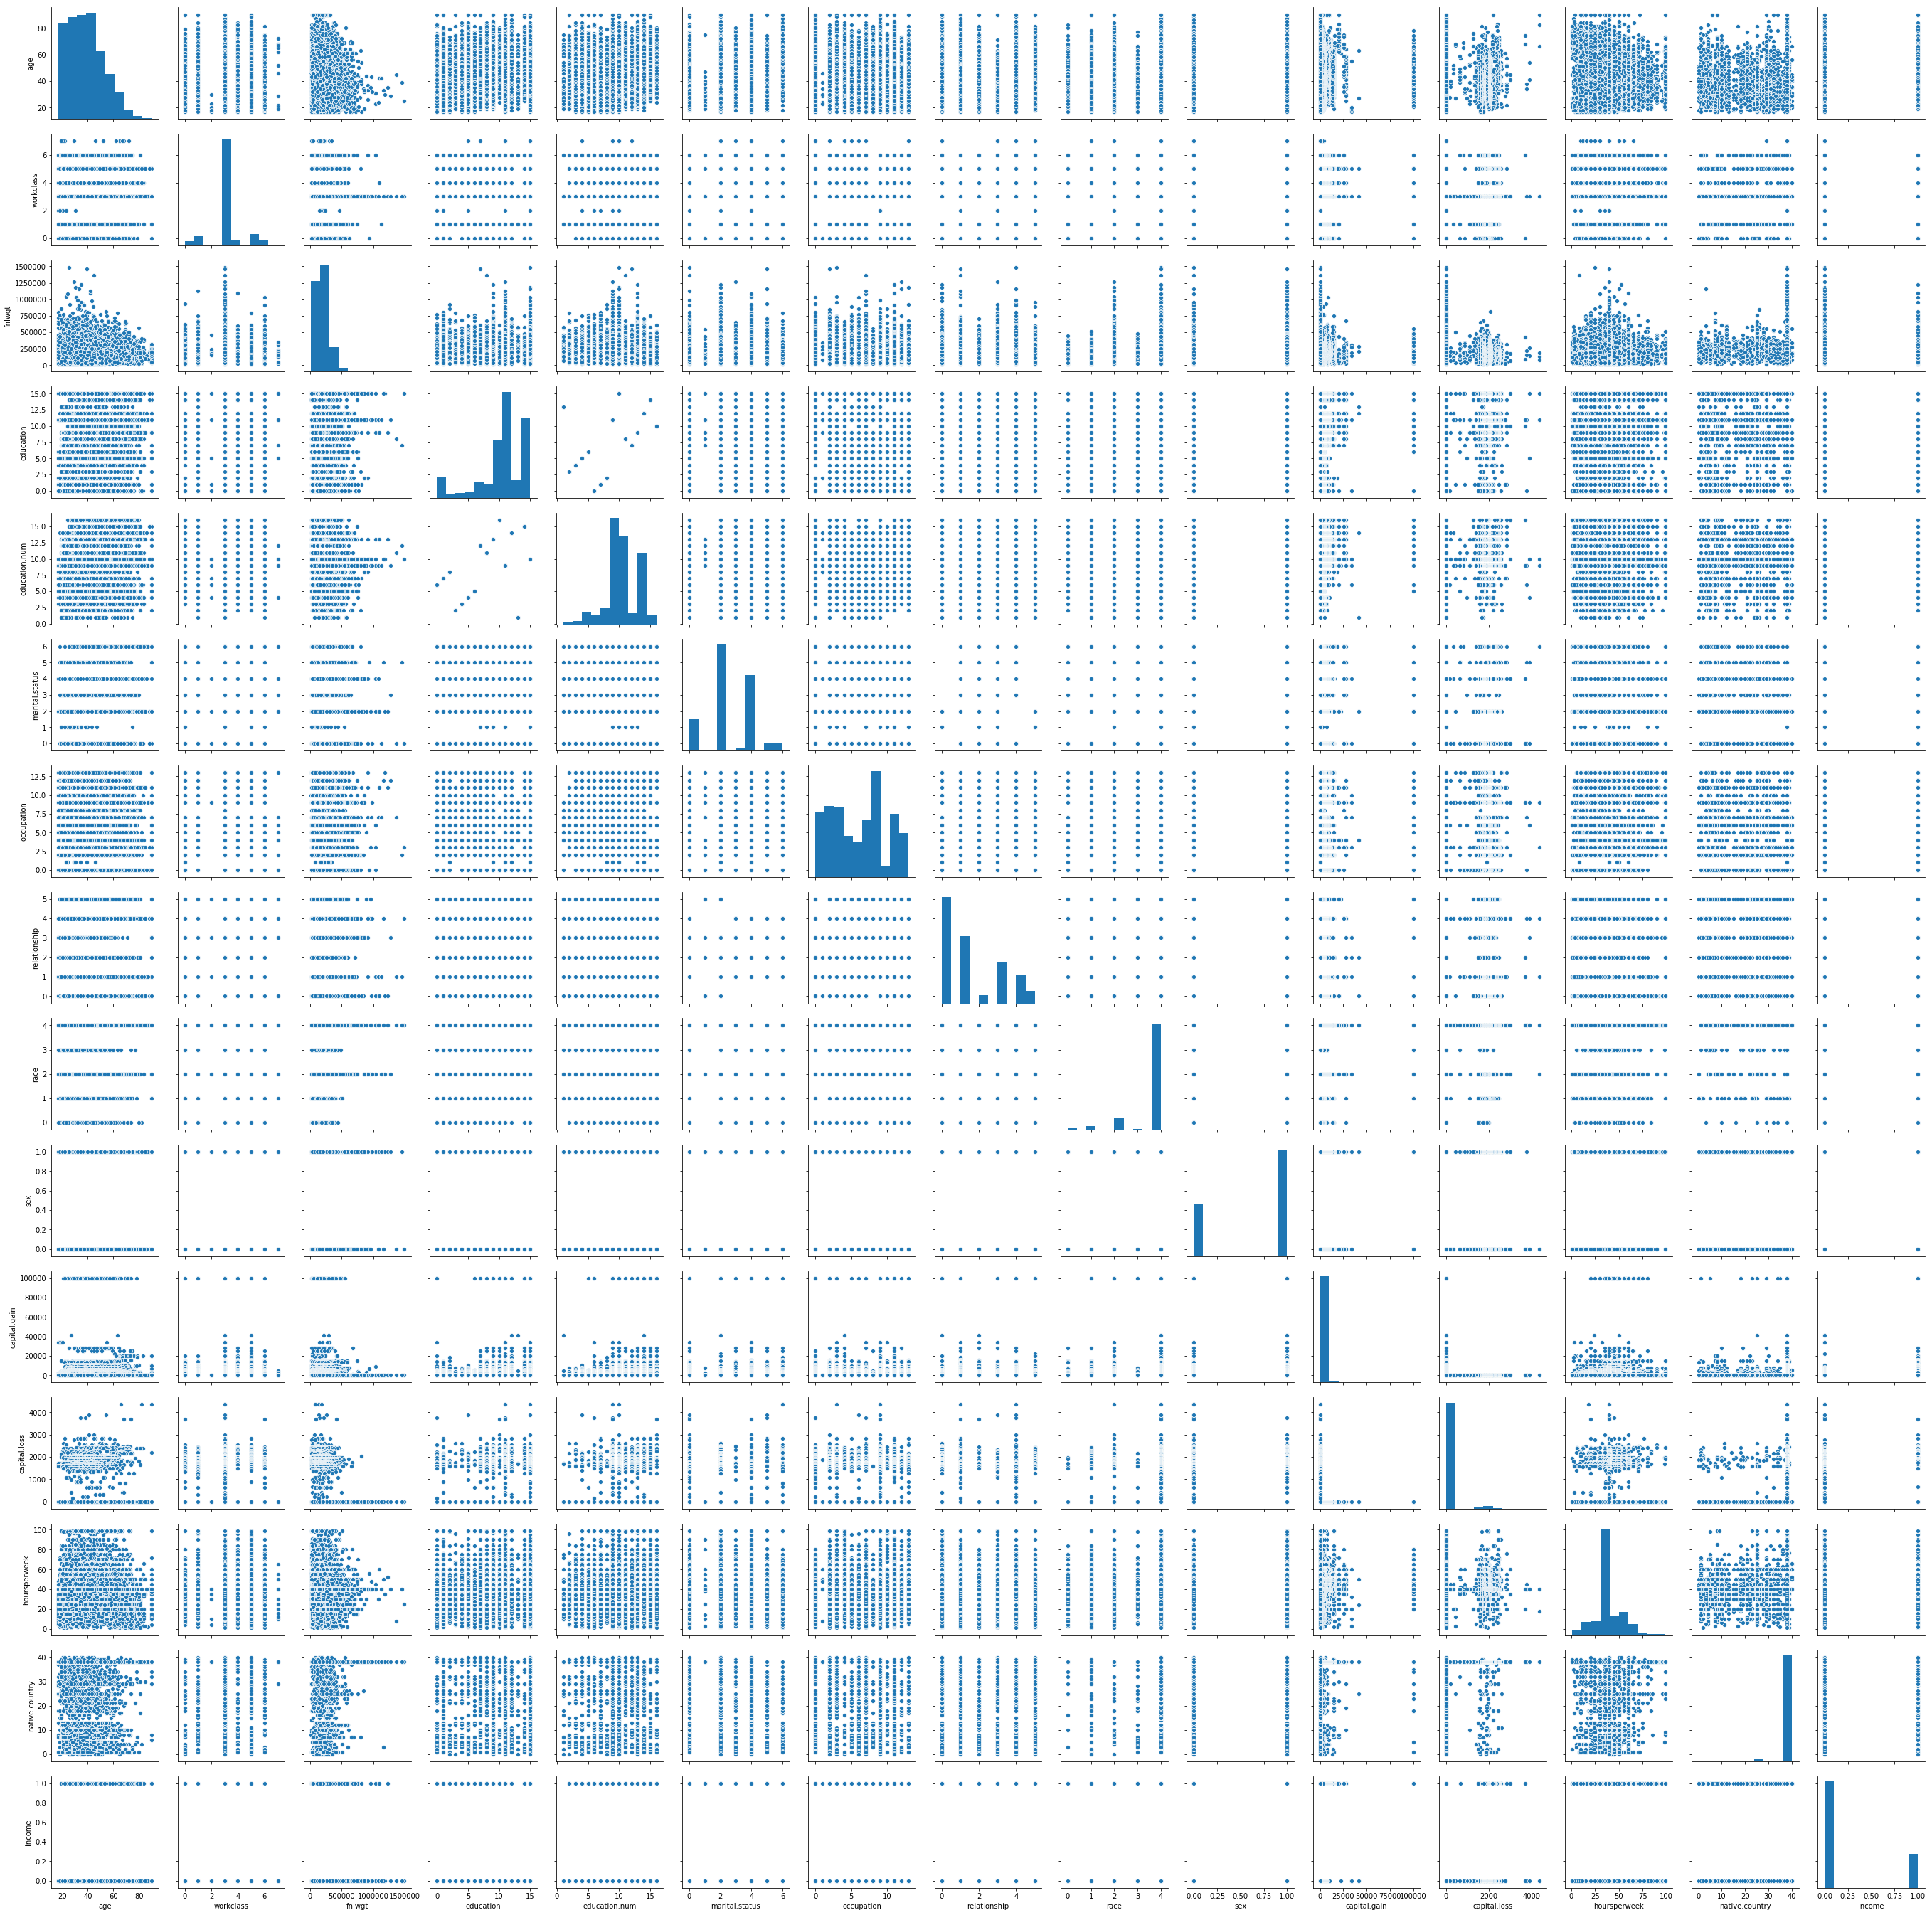

In [150]:
sns.pairplot(data=data)

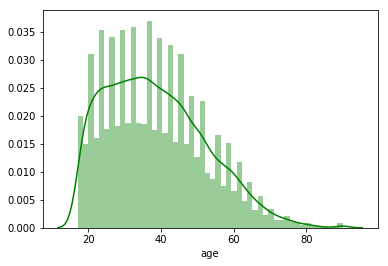

In [141]:
sns.distplot(data["age"],color="g")

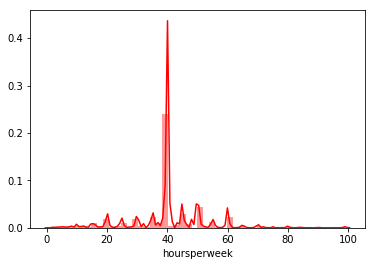

In [143]:
sns.distplot(data["hoursperweek"],color="r")

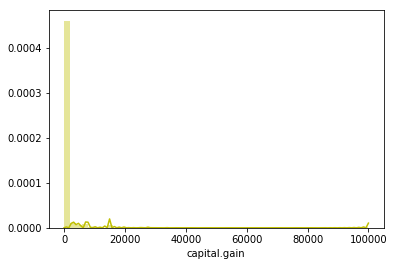

In [144]:
sns.distplot(data["capital.gain"],color="y")

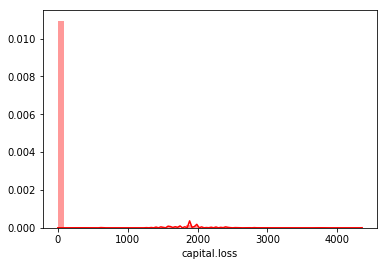

In [148]:
sns.distplot(data["capital.loss"],color="r")

Text(0.5, 0.98, 'Categorical Plotting')

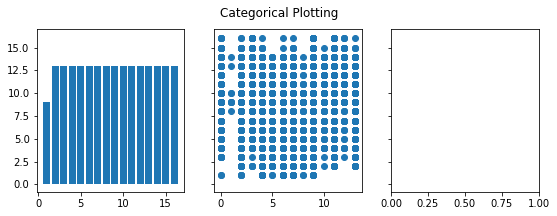

In [131]:
fig, axs = plt.subplots(1, 3, figsize=(9, 3), sharey=True)
axs[0].bar(data["education.num"], data["occupation"])
axs[1].scatter(data["occupation"], data["education.num"])
fig.suptitle('Categorical Plotting')

****STEP 8:REMOVING THE OUTLIERS****

In [394]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(Q1)
print(Q3)
IQR

age                   28.0
workclass              3.0
fnlwgt            117827.0
education              9.0
education.num          9.0
marital.status         2.0
occupation             3.0
relationship           0.0
race                   4.0
sex                    0.0
capital.gain           0.0
capital.loss           0.0
hoursperweek          40.0
native.country        38.0
income                 0.0
Name: 0.25, dtype: float64
age                   48.0
workclass              3.0
fnlwgt            237051.0
education             12.0
education.num         12.0
marital.status         4.0
occupation             9.0
relationship           3.0
race                   4.0
sex                    1.0
capital.gain           0.0
capital.loss           0.0
hoursperweek          45.0
native.country        38.0
income                 0.0
Name: 0.75, dtype: float64


age                   20.0
workclass              0.0
fnlwgt            119224.0
education              3.0
education.num          3.0
marital.status         2.0
occupation             6.0
relationship           3.0
race                   0.0
sex                    1.0
capital.gain           0.0
capital.loss           0.0
hoursperweek           5.0
native.country         0.0
income                 0.0
dtype: float64

In [395]:
IQR_SP=48.000000-28.000000
IQR_SP

20.0

In [396]:
Lower_bound=28.000000-(1.5*IQR_SP)
Upper_bound=48.000000+(1.5*IQR_SP)

In [397]:
data=data.query("age>-2.0 & age<78.0");

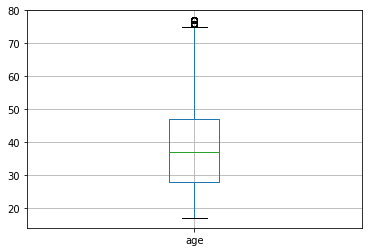

In [398]:
data.boxplot(column='age')

In [399]:
IQR_SP=45.0-40.0

In [400]:
Lower_bound=40.0-(1.5*IQR_SP)
Upper_bound=45.0+(1.5*IQR_SP)
print(Lower_bound)
Upper_bound

32.5


52.5

In [401]:
data=data.query("hoursperweek>32.5 & hoursperweek<52.5");

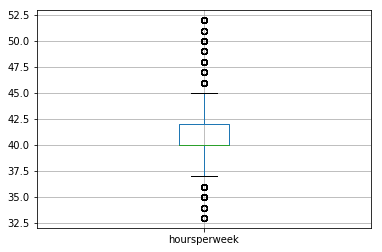

In [402]:
data.boxplot(column='hoursperweek')

****STEP 9:DATA STATISTICS****

In [403]:
data.describe()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hoursperweek,native.country,income
count,23491.000000,23491.000000,2.349100e+04,23491.000000,23491.000000,23491.000000,23491.000000,23491.000000,23491.000000,23491.000000,23491.000000,23491.000000,23491.000000,23491.000000,23491.000000
mean,38.727002,3.031289,1.916855e+05,10.337917,10.107701,2.508195,5.875995,1.370567,3.651484,0.687582,991.314631,87.942829,41.568345,36.369035,0.254991
std,12.170871,1.119813,1.054653e+05,3.684686,2.538117,1.489786,4.019958,1.604076,0.861150,0.463489,6718.858463,402.523343,4.014740,6.111062,0.435866
min,17.000000,0.000000,1.487800e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.000000,0.000000,0.000000
25%,29.000000,3.000000,1.195335e+05,9.000000,9.000000,2.000000,2.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,38.000000,0.000000
50%,38.000000,3.000000,1.803030e+05,11.000000,10.000000,2.000000,6.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,38.000000,0.000000
75%,47.000000,3.000000,2.388165e+05,12.000000,13.000000,4.000000,9.000000,3.000000,4.000000,1.000000,0.000000,0.000000,42.000000,38.000000,1.000000
max,77.000000,7.000000,1.455435e+06,15.000000,16.000000,6.000000,13.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,52.000000,40.000000,1.000000


In [545]:
data.corr()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hoursperweek,native.country,income
age,1.000000,0.020455,-0.082724,-0.029287,0.019675,-0.281545,0.000897,-0.219901,0.021674,0.068241,0.083003,0.058961,0.050924,0.007772,0.251657
workclass,0.020455,1.000000,-0.019670,-0.008000,-0.007162,-0.010272,0.013364,-0.043759,0.048215,0.056729,0.029687,-0.002379,0.061249,-0.003006,-0.008671
fnlwgt,-0.082724,-0.019670,1.000000,-0.029538,-0.048544,0.031646,0.006494,0.006431,-0.023111,0.028030,-0.003630,-0.012498,-0.011853,-0.071888,-0.010254
education,-0.029287,-0.008000,-0.029538,1.000000,0.331857,-0.023793,-0.039822,0.012586,0.017033,-0.038962,0.026093,0.014667,0.035859,0.091323,0.072070
education.num,0.019675,-0.007162,-0.048544,0.331857,1.000000,-0.031408,0.091804,-0.067616,0.027789,-0.014207,0.106419,0.073653,0.143963,0.103919,0.325318
marital.status,-0.281545,-0.010272,0.031646,-0.023793,-0.031408,1.000000,0.029595,0.150462,-0.075671,-0.085473,-0.034592,-0.027373,-0.085454,-0.029719,-0.170724
occupation,0.000897,0.013364,0.006494,-0.039822,0.091804,0.029595,1.000000,-0.056377,-0.005807,0.069229,0.017149,0.015357,0.053000,-0.005362,0.052232
relationship,-0.219901,-0.043759,0.006431,0.012586,-0.067616,0.150462,-0.056377,1.000000,-0.128149,-0.589917,-0.046354,-0.061898,-0.178599,-0.014229,-0.237571
race,0.021674,0.048215,-0.023111,0.017033,0.027789,-0.075671,-0.005807,-0.128149,1.000000,0.101672,0.011261,0.020070,0.092573,0.118255,0.075607
sex,0.068241,0.056729,0.028030,-0.038962,-0.014207,-0.085473,0.069229,-0.589917,0.101672,1.000000,0.038277,0.047164,0.177994,0.006378,0.207017


In [546]:
data.cov()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hoursperweek,native.country,income
age,148.130109,0.278785,-1.061844e+05,-1.313407,0.607777,-5.104979,0.043881,-4.293127,0.227159,0.384950,6.787503e+03,288.853570,2.488284,0.578060,1.335005
workclass,0.278785,1.253981,-2.323106e+03,-0.033008,-0.020356,-0.017136,0.060159,-0.078602,0.046495,0.029443,2.233608e+02,-1.072157,0.275363,-0.020572,-0.004232
fnlwgt,-106184.429364,-2323.105542,1.112292e+10,-11478.805410,-12994.346948,4972.169168,2753.161993,1087.932167,-2098.994482,1370.157039,-2.572022e+06,-530580.611484,-5018.539677,-46331.879953,-471.367917
education,-1.313407,-0.033008,-1.147881e+04,13.576910,3.103579,-0.130611,-0.589853,0.074391,0.054045,-0.066540,6.459895e+02,21.753803,0.530459,2.056347,0.115746
education.num,0.607777,-0.020356,-1.299435e+04,3.103579,6.442040,-0.118763,0.936685,-0.275289,0.060738,-0.016713,1.814796e+03,75.247750,1.466968,1.611849,0.359892
marital.status,-5.104979,-0.017136,4.972169e+03,-0.130611,-0.118763,2.219462,0.177240,0.359564,-0.097080,-0.059019,-3.462527e+02,-16.414666,-0.511107,-0.270564,-0.110859
occupation,0.043881,0.060159,2.753162e+03,-0.589853,0.936685,0.177240,16.160058,-0.363539,-0.020103,0.128988,4.631982e+02,24.848892,0.855368,-0.131716,0.091519
relationship,-4.293127,-0.078602,1.087932e+03,0.074391,-0.275289,0.359564,-0.363539,2.573061,-0.177018,-0.438587,-4.995806e+02,-39.966127,-1.150168,-0.139483,-0.166100
race,0.227159,0.046495,-2.098994e+03,0.054045,0.060738,-0.097080,-0.020103,-0.177018,0.741579,0.040581,6.515351e+01,6.957001,0.320053,0.622320,0.028379
sex,0.384950,0.029443,1.370157e+03,-0.066540,-0.016713,-0.059019,0.128988,-0.438587,0.040581,0.214822,1.191998e+02,8.799209,0.331208,0.018065,0.041821


In [406]:
data['income'].value_counts()

0    17501
1     5990
Name: income, dtype: int64

****STEP 10:CHOOSING THE PREDICTOR AND TARGET VARIABLES****

In [33]:
X=data.iloc[:,[6,10,11,12]].values
y=data.iloc[:,[14]].values

***STEP 11:SPLITING THE DATA INTO TRAIN AND TEST***

In [97]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.21,random_state=1)

***STEP 12:APPLYING RANDOM FOREST CLASSIFICATION MODEL***

In [98]:
from sklearn.ensemble import RandomForestClassifier
rmf=RandomForestClassifier(max_depth=3,random_state=0) 
rf_classi=RandomForestClassifier(n_estimators=90)
rf_classi.fit(X_train,y_train) 

C:\Users\tejaswini banala\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=90, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

****STEP 13:PREDICTING THE OUTCOMES FROM THE TRAINED MODEL****

In [99]:
rf_classi_y_test=rf_classi.predict(X_test)
rf_classi_y_test 

array([1, 1, 0, ..., 0, 0, 0])

In [162]:
rf_classi_y_train=rf_classi.predict(X_train)
rf_classi_y_train 

array([1, 0, 0, ..., 0, 1, 0])

****STEP 14:CONFUSION MATRIX****

In [100]:
from sklearn.metrics import confusion_matrix 
rf_cm_test=confusion_matrix(y_test,rf_classi_y_test) 
rf_cm_test 

array([[5069,  118],
       [1035,  616]], dtype=int64)

***STEP 15: ACCURACY SCORE***

In [101]:
from sklearn.metrics import accuracy_score 
rf_accu_test=accuracy_score(y_test,rf_classi_y_test) 
rf_accu_test 

0.8313834454518865

***STEP 16:PRECISION SCORE***

In [102]:
from sklearn.metrics import precision_score
pr_score=precision_score(y_test,rf_classi_y_test)
pr_score

0.8392370572207084

***STEP 17:RECALL SCORE***

In [103]:
from sklearn.metrics import recall_score
recall_score=recall_score(y_test,rf_classi_y_test)
recall_score

0.37310720775287703

In [168]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,rf_classi_y_test)
rmse=np.sqrt(mse)
rmse

0.4106294613737712

In [167]:
mse=mean_squared_error(y_train,rf_classi_y_train)
rmse_test=np.sqrt(mse)
rmse_test

0.4028240703587383

In [166]:
from sklearn.metrics import r2_score
r2_s_train=r2_score(y_test,rf_classi_y_test)
r2_s_train

0.07934888705713383

In [165]:
r2_s_test=r2_score(y_train,rf_classi_y_train)
r2_s_test

0.11199693786919751

In [157]:
from sklearn.metrics import roc_auc_score
rf_probs = rf_classi.predict_proba(X_test)[:, 1]

In [159]:
roc_value = roc_auc_score(y_test, rf_probs)

In [160]:
roc_value

0.8257640910737917